Credits/Course URL - https://www.udemy.com/course/the-ultimate-beginners-guide-to-natural-language-processing/

In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import en_core_web_sm
import random
import re
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from langdetect import detect
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from slugify import slugify, Slugify
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


## Sentiment Analysis using Twitter Data

#### Reading the data and exploration

In [2]:
tweets = pd.read_csv(r'E:\Github\Datasets\tweets.csv', 
                     low_memory=False, 
                     encoding = 'latin1', 
                     header=None,
                     names=['sentiment', 'id', 'date', 'query', 'user', 'text'])

In [3]:
tweets.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
tweets['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [6]:
tweets_processed = tweets.copy(deep=True)

#### Splitting the dataset

In [7]:
tweets_processed = tweets_processed.drop(['id', 'date', 'query', 'user'], axis = 1)

In [8]:
tweets_processed.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [9]:
X_ = tweets_processed['text'].values
y_ = tweets_processed['sentiment'].values

In [10]:
X, X_, y, y_ = train_test_split(X_, y_, test_size=0.90, random_state=42)

In [11]:
X.shape, y.shape

((160000,), (160000,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
X_train.shape, y_train.shape

((120000,), (120000,))

In [16]:
X_test.shape, y_test.shape

((40000,), (40000,))

In [17]:
np.unique(y_train, return_counts=True)

(array([0, 4], dtype=int64), array([59903, 60097], dtype=int64))

In [18]:
np.unique(y_test, return_counts=True)

(array([0, 4], dtype=int64), array([20132, 19868], dtype=int64))

#### Detecting language

In [19]:
detect('lets see which language is this!')

'en'

In [20]:
def lang_detector(sentence_list):
    
    lang_detected_list = []
    
    for index, tweet in enumerate(sentence_list):
        try:
            if len(tweet) != 0:
                lang = detect(tweet)
                lang_detected_list.append(lang)
            else:
                lang_detected_list.append('EMPTY TWEET')
        except:
            print(f"Exception Encountered at position {index}: {tweet}")        
            lang_detected_list.append('UNKNOWN LANG : '+ str(tweet))
            pass
    return lang_detected_list

In [21]:
lang_X_train = lang_detector(X_train)

Exception Encountered at position 19075: Work@Amata 
Exception Encountered at position 38730: Sunday@Office .... 
Exception Encountered at position 91580:  lol@teedramoses


In [22]:
lang_X_test = lang_detector(X_test)

Checking how many unique languages got detected

In [23]:
np.unique(lang_X_train, return_counts=True)

(array(['UNKNOWN LANG :  lol@teedramoses',
        'UNKNOWN LANG : Sunday@Office .... ', 'UNKNOWN LANG : Work@Amata ',
        'af', 'ca', 'cs', 'cy', 'da', 'de', 'en', 'es', 'et', 'fi', 'fr',
        'hr', 'hu', 'id', 'it', 'lt', 'lv', 'nl', 'no', 'pl', 'pt', 'ro',
        'sk', 'sl', 'so', 'sq', 'sv', 'sw', 'tl', 'tr', 'uk', 'vi'],
       dtype='<U34'),
 array([     1,      1,      1,   1184,    255,     58,    742,    243,
           289, 111462,     85,    358,    193,    388,    103,     24,
           420,    278,     19,      6,    581,    479,    154,    101,
           116,     66,     66,   1016,     77,    233,    129,    681,
           106,      2,     83], dtype=int64))

In [24]:
np.unique(lang_X_test, return_counts=True)

(array(['af', 'ca', 'cs', 'cy', 'da', 'de', 'en', 'es', 'et', 'fi', 'fr',
        'hr', 'hu', 'id', 'it', 'lt', 'lv', 'nl', 'no', 'pl', 'pt', 'ro',
        'sk', 'sl', 'so', 'sq', 'sv', 'sw', 'tl', 'tr', 'uk', 'vi'],
       dtype='<U2'),
 array([  432,    87,    20,   235,    93,    94, 37183,    27,   101,
           51,   106,    36,    13,   145,    81,     6,     2,   214,
          136,    51,    28,    36,    17,    25,   367,    21,    91,
           36,   214,    15,     1,    36], dtype=int64))

In [216]:
X_train_df = pd.DataFrame({'X_train': X_train, 'y_train': y_train, 'lang_X_train': lang_X_train})
X_train_df.head()

,X_train,y_train,lang_X_train
0,@la_bellachica Its Ok lol i feel so much bigge...,4,en
1,@Daionii glasses are hot on girls,4,en
2,Don't have the time 2 bike 2day. What a lousy ...,0,en
3,"Wow, Â£155 for an administration charge. And ...",0,en
4,@TillyRossetti i just had some too- but unfor...,0,en


In [217]:
X_test_df = pd.DataFrame({'X_test': X_test, 'y_test': y_test, 'lang_X_test': lang_X_test})
X_test_df.head()

,X_test,y_test,lang_X_test
0,@mattpicasso iPhone is doing that &quot;not op...,0,en
1,@H4mTar0 Day of the Tentacle: briljant!,4,en
2,Who's that GIRL?? Livin' MY LIFE!!!!!!!!!!! I'...,0,en
3,tryna b a gud friend but i dunno if i can keep...,0,id
4,@Halliwellicious Ciao teso... Come stai?,4,it


In [218]:
X_train_df = X_train_df[X_train_df['lang_X_train'] == 'en']
X_test_df = X_test_df[X_test_df['lang_X_test'] == 'en']

In [39]:
X_train_df['X_train'][0]

'@la_bellachica Its Ok lol i feel so much bigger than what i am! ugh when you gonna cook for me '

In [44]:
slugify(X_test_df['X_test'][2], to_lower = True, separator = ' ')

'whos that girl livin my life im soooo sad why i love u but i want him'

In [46]:
custom_slugify = Slugify(to_lower = True, 
                         separator = ' ',
                         safe_chars = '@')

In [47]:
custom_slugify(X_test_df['X_test'][0])

'@mattpicasso iphone is doing that quot not opening downloaded apps quot thing and i forgot my cord at home'

In [48]:
custom_slugify('lets try this @love myself party @ 31 Dec 2022!!!!!!')

'lets try this @love myself party @ 31 dec 2022'

#### Cleaning the data

In [219]:
def regex_to_find_continuous_strings(string_to_convert):
    
    str_regex = []
    
    for letter in string_to_convert:
        str_regex.append(f'[{letter}]+')
        str_regex.append('|')
    
    return ''.join(str_regex[:-1])

In [226]:
small_letters_repeated_regex= regex_to_find_continuous_strings('abcdefghijklmnopqrstuvwxyz')
capital_letters_repeated_regex = regex_to_find_continuous_strings('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [245]:
capital_letters_repeated_regex

'[A]+|[B]+|[C]+|[D]+|[E]+|[F]+|[G]+|[H]+|[I]+|[J]+|[K]+|[L]+|[M]+|[N]+|[O]+|[P]+|[Q]+|[R]+|[S]+|[T]+|[U]+|[V]+|[W]+|[X]+|[Y]+|[Z]+'

In [222]:
small_letters_repeated_regex

'[A]+|[B]+|[C]+|[D]+|[E]+|[F]+|[G]+|[H]+|[I]+|[J]+|[K]+|[L]+|[M]+|[N]+|[O]+|[P]+|[Q]+|[R]+|[S]+|[T]+|[U]+|[V]+|[W]+|[X]+|[Y]+|[Z]+'

In [49]:
nlp = spacy.load('en_core_web_sm')
nlp

In [301]:
def preprocessing(sentence):
    #print(f' Recieved string: {sentence}')
    sentence = re.sub(r"https?://[A-Za-z0-9/.-]+", ' ', sentence) # Remove URLs
    #print(f' URLs removed: {sentence}')
    custom_slugify = Slugify(to_lower = True, 
                         separator = ' ',
                         safe_chars = '@')
    
    sentence = custom_slugify(sentence)
    #print(f' Slugified: {sentence}')
    #sentence = sentence.lower()
    sentence = re.sub(r"@[A-Za-z0-9]+", '', sentence) # removing twitter username
    #print(f' Twitter Username removed : {sentence}')
    sentence = re.sub(r"[0-9]+[A-Za-z]+", '', sentence) # removing strings starting with numbers in the string
    #print(f' Number starting strings removed : {sentence}')
    sentence = re.sub(r"[0-9]+", '', sentence) # removing numbers in the string
    #print(f' Numbers removed : {sentence}')
    sentence = re.sub(r'((\w)\2{2,})', '', sentence)
    #print(f' Repeated words removed : {sentence}')
    #sentence = re.sub('r'+small_letters_repeated_regex, ' ', sentence) 
    
    #tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token) == 1)]
    tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.is_punct or token.is_space or len(token) == 1)]
    
    tokens = ' '.join(tokens)
    #print(f'  Tokenized : {tokens}')
    return tokens

In [302]:
expr = ''
test_st = re.sub(r'((\w)\2{2,})', '', 'sentence Z ZZ ZZZ ZZZZZ ZZZZ Third ZZZZZZZZZZZ AAAAAA DDDDDDDDDDDD cccccccccc zzzzzzzzz hellp HELP hii TH')
test_st

'sentence Z ZZ    Third      hellp HELP hii TH'

Testing preprocessing function

In [303]:
test_str = "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. 2day You shoulda got 1 David Carr of Third Day to do it. hhhhh SSS lolzz ;D"

preprocessing(test_str)

'bummer shoulda got david carr day lolzz'

Cleaning Train data and randomly displaying 10 tweets after cleaning

In [304]:
X_train_cleaned = [preprocessing(tweet) for tweet in X_train_df['X_train']]

In [305]:
for cnt in range(10):
    print(X_train_cleaned[random.randint(0, len(X_train_cleaned)-1)])

guess wait like suggests
restrictions font size pages come quickly ll smacked disregard
sudying maths exam thursday hard
means lots time working user invaluable invaluable passed designers system
watching birds dog backyard dads cooking sweet potato pancakes
nt hang cheetah girls movie night mega worried rere
worst dream person possibly
wish wish wish wish wish wish
warped tour tour pissed
whoo hoo happy birthday tristan


Cleaning Test data and randomly displaying 10 tweets after cleaning

In [306]:
X_test_cleaned = [preprocessing(tweet) for tweet in X_test_df['X_test']]

In [307]:
for cnt in range(10):
    print(X_test_cleaned[random.randint(0, len(X_test_cleaned)-1)])

noo weather sucks
smh niggas ai nt holla
watching grease ky exd
vans tan shorts tan gon na worse friday
going good
post gone like wipe privates em clean counters
blog loaded music pleas visit
relaxing hammock beautiful day ate
omg got starbucks look cute
taking wish luck


Converting trainig and testing data into Series (so that we can do df like operations later, if needed)

In [308]:
X_train_cleaned = pd.Series(X_train_cleaned)
X_test_cleaned = pd.Series(X_test_cleaned)

In [309]:
X_train_df.shape[0], X_train_cleaned.shape[0]

(111462, 111462)

In [310]:
X_test_df.shape[0], X_test_cleaned.shape[0]

(37183, 37183)

In [311]:
X_train_df = pd.concat([X_train_df.reset_index(drop=True), X_train_cleaned], axis = 1)
X_train_df = X_train_df.rename(columns={0: 'X_train_cleaned'})

In [312]:
X_train_df.tail()

,X_train,y_train,lang_X_train,X_train_cleaned
111457,@Tinkerbell2009a Hi! I'm well thank you and yo...,4,en,hi thank hope having good sunday far
111458,Tired from everything today. Had loads of fun ...,4,en,tired today loads fun havta ready church
111459,blahh well the bus s really cold today and I d...,0,en,blahh bus cold today nt jacket haha people nee...
111460,Good morning everyone,4,en,good morning
111461,@Shatran,4,en,


In [313]:
X_test_df = pd.concat([X_test_df.reset_index(drop=True), X_test_cleaned], axis = 1)
X_test_df = X_test_df.rename(columns={0: 'X_test_cleaned'})

In [314]:
X_test_df.tail()

,X_test,y_test,lang_X_test,X_test_cleaned
37178,i'm sooo bored. listening to some K-pop goodn...,0,en,bored listening pop goodness haha
37179,@ExocetAU you have a cane?,4,en,cane
37180,@englishteach8 thanks for the follow Friday -...,4,en,thanks follow friday saturday
37181,I hate Tuesdays....stupid update in progress.,0,en,hate tuesdays stupid update progress
37182,On the road home. We discovered a dedicab SN2 ...,0,en,road home discovered dedicab sn unlock code fa...


In [315]:
X_train_df.shape[0] == X_train_df['lang_X_train'].value_counts()['en']

True

In [316]:
X_test_df.shape[0] == X_test_df['lang_X_test'].value_counts()['en']

True

In [317]:
null_cleaned_tweets_percent_train = round((sum(X_train_df['X_train_cleaned'] == '')/X_train_df.shape[0])*100,2)
null_cleaned_tweets_percent_test = round((sum(X_test_df['X_test_cleaned'] == '')/X_test_df.shape[0])*100,2)

In [318]:
print(f'Data Percent having nothing after tweets are cleaned (of Training Data): {null_cleaned_tweets_percent_train}%')
print(f'Data Percent having nothing after tweets are cleaned (of Testing Data): {null_cleaned_tweets_percent_test}%')

Data Percent having nothing after tweets are cleaned (of Training Data): 0.48%
Data Percent having nothing after tweets are cleaned (of Testing Data): 0.44%


In [319]:
X_train_df = X_train_df[X_train_df['X_train_cleaned'] != '']
X_test_df = X_test_df[X_test_df['X_test_cleaned'] != '']

#### Wordcloud

In [320]:
' '.join(pd.Series(['abc', 'def', '123']))

'abc def 123'

In [321]:
X_train_cleaned_concatd = ' '.join(X_train_df['X_train_cleaned'])
X_test_cleaned_concatd = ' '.join(X_test_df['X_test_cleaned'])

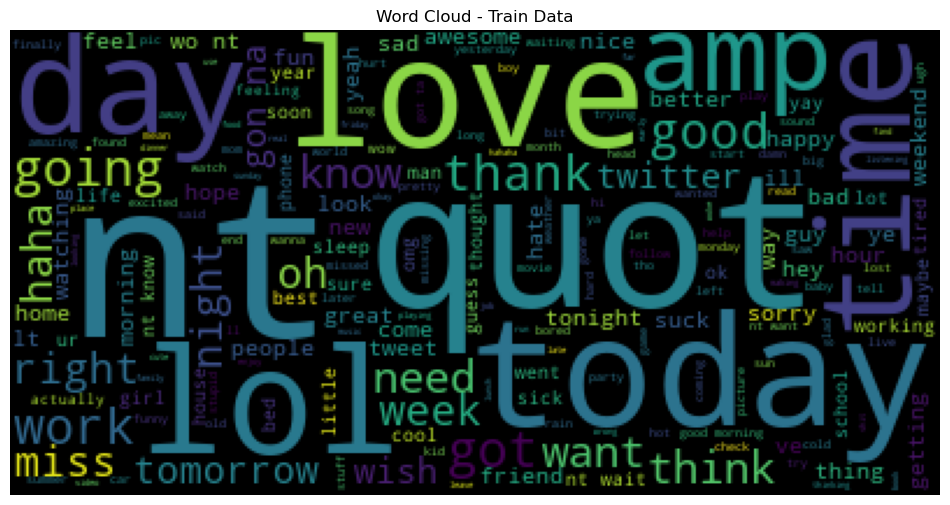

In [322]:
word_cloud = WordCloud()
word_cloud = word_cloud.generate(X_train_cleaned_concatd)

plt.figure(figsize=(12,12))
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Word Cloud - Train Data");

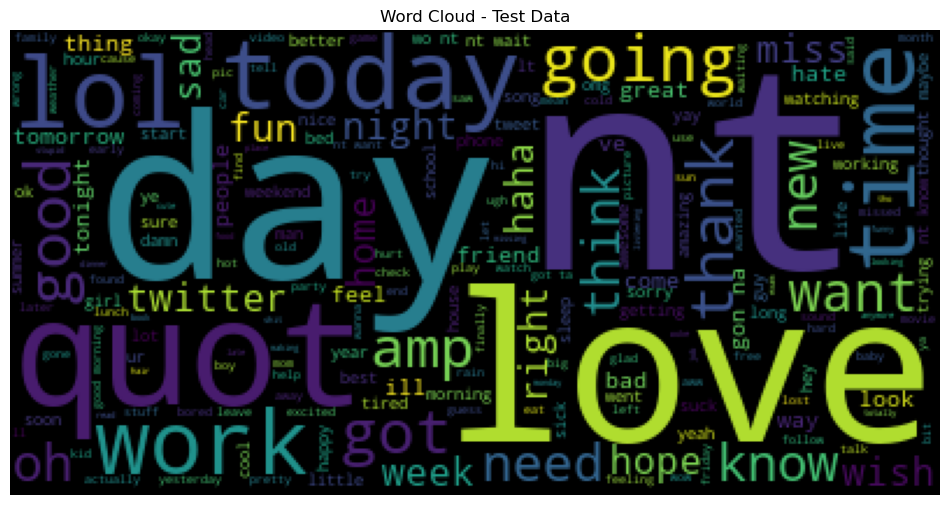

In [323]:
word_cloud = WordCloud()
word_cloud = word_cloud.generate(X_test_cleaned_concatd)

plt.figure(figsize=(12,12))
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Word Cloud - Test Data");

#### Sentiment Analysis using NLTK's 'SentimentIntensityAnalyzer'

In [324]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Luvkush\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [325]:
nltk_sentiment_classifier = SentimentIntensityAnalyzer()

In [326]:
nltk_sentiment_classifier.polarity_scores('I love India')

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [327]:
for string in ['I hate origano', 'Pizzas are not so tasty', 'Burgers are love!!', 'I will got to market']:
    print(nltk_sentiment_classifier.polarity_scores(string))

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.6988}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [328]:
X_train_df.head(3)

,X_train,y_train,lang_X_train,X_train_cleaned
0,@la_bellachica Its Ok lol i feel so much bigge...,4,en,bellachica ok lol feel bigger ugh gon na cook
1,@Daionii glasses are hot on girls,4,en,glasses hot girls
2,Don't have the time 2 bike 2day. What a lousy ...,0,en,nt time bike lousy day


In [329]:
X_train_modelling = X_train_df['X_train_cleaned'].values
y_train_modelling = X_train_df['y_train'].values

In [330]:
X_test_df.head(3)

,X_test,y_test,lang_X_test,X_test_cleaned
0,@mattpicasso iPhone is doing that &quot;not op...,0,en,iphone quot opening downloaded apps quot thing...
1,@H4mTar0 Day of the Tentacle: briljant!,4,en,day tentacle briljant
2,Who's that GIRL?? Livin' MY LIFE!!!!!!!!!!! I'...,0,en,girl livin life sad love want


In [331]:
X_test_modelling = X_test_df['X_test_cleaned'].values
y_test_modelling = X_test_df['y_test'].values

In [332]:
def nltk_sentiment_predictor(data):
    
    predicted_sentiment = []
    
    for tweet in data:

        sentiments = nltk_sentiment_classifier.polarity_scores(tweet)

        if sentiments['neg'] >= 0.4:
            predicted_sentiment.append(0)
        else:
            predicted_sentiment.append(4) # neutral sentiment is also considered as positive
        
    return predicted_sentiment


In [333]:
y_pred_train_nltk = nltk_sentiment_predictor(X_train_modelling)

In [334]:
y_pred_test_nltk = nltk_sentiment_predictor(X_test_modelling)

#### Result Analysis - NLTK's 'SentimentIntensityAnalyzer'

In [336]:
print('\n **************** Classification Report - Training Data **************** \n')
print(classification_report(y_train_modelling, np.array(y_pred_train_nltk)))


 **************** Classification Report - Training Data **************** 

              precision    recall  f1-score   support

           0       0.83      0.21      0.34     55609
           4       0.55      0.95      0.70     55316

    accuracy                           0.58    110925
   macro avg       0.69      0.58      0.52    110925
weighted avg       0.69      0.58      0.52    110925




 **************** Confusion Martix - Training Data **************** 



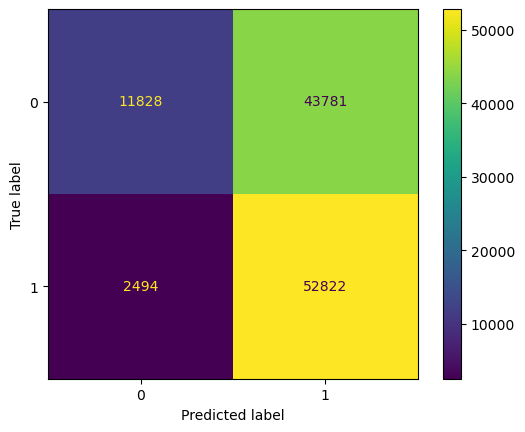

In [338]:
print('\n **************** Confusion Martix - Training Data **************** \n')
cm = confusion_matrix(y_train_modelling, np.array(y_pred_train_nltk))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show();

In [339]:
print('\n **************** Classification Report - Testing Data **************** \n')
print(classification_report(y_test_modelling, np.array(y_pred_test_nltk)))


 **************** Classification Report - Testing Data **************** 

              precision    recall  f1-score   support

           0       0.83      0.22      0.35     18686
           4       0.55      0.95      0.69     18334

    accuracy                           0.58     37020
   macro avg       0.69      0.59      0.52     37020
weighted avg       0.69      0.58      0.52     37020




 **************** Confusion Martix - Testing Data **************** 



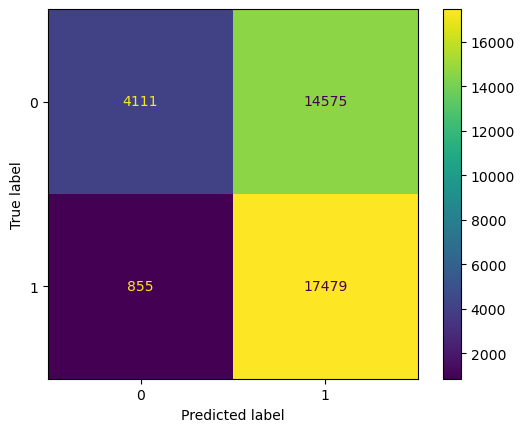

In [340]:
print('\n **************** Confusion Martix - Testing Data **************** \n')
cm = confusion_matrix(y_test_modelling, np.array(y_pred_test_nltk))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show();

#### Sentiment Analysis using TF-IDF

In [341]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_modelling)

In [342]:
X_train_tfidf.shape

(110925, 53142)

In [343]:
vectorizer.get_feature_names_out()

array(['aa', 'aac', 'aadvanspijk', ..., 'zyrus', 'zz', 'zzs'],
      dtype=object)

Lemmatization to reduce the dimention

In [344]:
def preprocess_lemma(sentence):
    nlp = spacy.load('en_core_web_sm')
    tokens = [tok.lemma_ for tok in nlp(sentence)]
    tokens = ' '.join(tokens)
    return tokens

In [345]:
preprocess_lemma('learn learned learning askg en espo')

'learn learn learn askg en espo'

In [363]:
X_train_modelling.shape, X_test_modelling.shape

((110925,), (37020,))

Because Lemmitization will take lot of time for huge data, trimming the number of rows to lesser value

In [360]:
X_train_df.head(3)

,X_train,y_train,lang_X_train,X_train_cleaned
0,@la_bellachica Its Ok lol i feel so much bigge...,4,en,bellachica ok lol feel bigger ugh gon na cook
1,@Daionii glasses are hot on girls,4,en,glasses hot girls
2,Don't have the time 2 bike 2day. What a lousy ...,0,en,nt time bike lousy day


In [377]:
rng = np.random.default_rng()
random_indexes = rng.choice(np.arange(X_train_df.shape[0]), 2500, replace=False)

In [378]:
random_indexes

array([ 70478,   9085, 107581, ...,  38161,  78733,  85309])

In [382]:
X_train_df_subset = X_train_df.iloc[random_indexes, :]
X_train_df_subset.head()

,X_train,y_train,lang_X_train,X_train_cleaned
70803,suddenly feel like watching Good Luck,4,en,suddenly feel like watching good luck
9132,Artomatic closed at 8:00 tonight At least we...,0,en,artomatic closed tonight nt going originally p...
108104,@msohsowright im jealous 2,0,en,jealous
22444,"@jayxtreme I went fishing once, got totally bo...",4,en,went fishing got totally bored nt understand t...
9956,had a hideous day at work... could do with ome...,0,en,hideous day work omeone bringing wine ice crea...


In [362]:
X_test_df.head(3)

,X_test,y_test,lang_X_test,X_test_cleaned
0,@mattpicasso iPhone is doing that &quot;not op...,0,en,iphone quot opening downloaded apps quot thing...
1,@H4mTar0 Day of the Tentacle: briljant!,4,en,day tentacle briljant
2,Who's that GIRL?? Livin' MY LIFE!!!!!!!!!!! I'...,0,en,girl livin life sad love want


In [383]:
rng = np.random.default_rng()
random_indexes = rng.choice(np.arange(X_test_df.shape[0]), 1000, replace=False)

In [384]:
X_test_df_subset = X_test_df.iloc[random_indexes, :]
X_test_df_subset.head()

,X_test,y_test,lang_X_test,X_test_cleaned
23081,oops typo evenfutl day! im going to bed WTF,0,en,oops typo evenfutl day going bed wtf
33813,@lynbot yew can take me,4,en,yew
17607,I'm still very sick but working 11-8 anyways.,0,en,sick working anyways
18442,@AnamariaAHH i want some of your eggs,0,en,want eggs
19074,@bsmrocks Anyone else in the band and it would...,0,en,band dead cert unfortunately looks like mirror


In [385]:
X_train_modelling_smallerdf = X_train_df_subset['X_train_cleaned'].values
y_train_modelling_smallerdf = X_train_df_subset['y_train'].values

X_test_modelling_smallerdf = X_test_df_subset['X_test_cleaned'].values
y_test_modelling_smallerdf = X_test_df_subset['y_test'].values

In [387]:
X_train_cleaned_lemma = []

for index, tweet in enumerate(X_train_modelling_smallerdf):
    
    try:
        X_train_cleaned_lemma.append(preprocess_lemma(tweet))
        #print(f"Index {index}: DONE")
    except:
        print(f'Error Encountered at {index}: {tweet}')
        X_train_cleaned_lemma.append(f'ERROR at index: {index}')
        pass

In [388]:
X_test_cleaned_lemma = []

for index, tweet in enumerate(X_test_modelling_smallerdf):
    
    try:
        X_test_cleaned_lemma.append(preprocess_lemma(tweet))
        print(f"Index {index}: DONE")
    except:
        print(f'Error Encountered at {index}: {tweet}')
        X_test_cleaned_lemma.append(f'ERROR at index: {index}')
        pass

Index 0: DONE
Index 1: DONE
Index 2: DONE
Index 3: DONE
Index 4: DONE
Index 5: DONE
Index 6: DONE
Index 7: DONE
Index 8: DONE
Index 9: DONE
Index 10: DONE
Index 11: DONE
Index 12: DONE
Index 13: DONE
Index 14: DONE
Index 15: DONE
Index 16: DONE
Index 17: DONE
Index 18: DONE
Index 19: DONE
Index 20: DONE
Index 21: DONE
Index 22: DONE
Index 23: DONE
Index 24: DONE
Index 25: DONE
Index 26: DONE
Index 27: DONE
Index 28: DONE
Index 29: DONE
Index 30: DONE
Index 31: DONE
Index 32: DONE
Index 33: DONE
Index 34: DONE
Index 35: DONE
Index 36: DONE
Index 37: DONE
Index 38: DONE
Index 39: DONE
Index 40: DONE
Index 41: DONE
Index 42: DONE
Index 43: DONE
Index 44: DONE
Index 45: DONE
Index 46: DONE
Index 47: DONE
Index 48: DONE
Index 49: DONE
Index 50: DONE
Index 51: DONE
Index 52: DONE
Index 53: DONE
Index 54: DONE
Index 55: DONE
Index 56: DONE
Index 57: DONE
Index 58: DONE
Index 59: DONE
Index 60: DONE
Index 61: DONE
Index 62: DONE
Index 63: DONE
Index 64: DONE
Index 65: DONE
Index 66: DONE
Index

Index 519: DONE
Index 520: DONE
Index 521: DONE
Index 522: DONE
Index 523: DONE
Index 524: DONE
Index 525: DONE
Index 526: DONE
Index 527: DONE
Index 528: DONE
Index 529: DONE
Index 530: DONE
Index 531: DONE
Index 532: DONE
Index 533: DONE
Index 534: DONE
Index 535: DONE
Index 536: DONE
Index 537: DONE
Index 538: DONE
Index 539: DONE
Index 540: DONE
Index 541: DONE
Index 542: DONE
Index 543: DONE
Index 544: DONE
Index 545: DONE
Index 546: DONE
Index 547: DONE
Index 548: DONE
Index 549: DONE
Index 550: DONE
Index 551: DONE
Index 552: DONE
Index 553: DONE
Index 554: DONE
Index 555: DONE
Index 556: DONE
Index 557: DONE
Index 558: DONE
Index 559: DONE
Index 560: DONE
Index 561: DONE
Index 562: DONE
Index 563: DONE
Index 564: DONE
Index 565: DONE
Index 566: DONE
Index 567: DONE
Index 568: DONE
Index 569: DONE
Index 570: DONE
Index 571: DONE
Index 572: DONE
Index 573: DONE
Index 574: DONE
Index 575: DONE
Index 576: DONE
Index 577: DONE
Index 578: DONE
Index 579: DONE
Index 580: DONE
Index 58

Re-running TF-IDF after lemmitization

In [389]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(np.array(X_train_cleaned_lemma))

In [390]:
X_train_tfidf.shape

(2500, 4569)

In [392]:
X_test_tfidf = vectorizer.transform(np.array(X_test_cleaned_lemma))

In [393]:
X_test_tfidf.shape

(1000, 4569)

In [397]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_tfidf, y_train_modelling_smallerdf)

DecisionTreeClassifier()

In [398]:
y_pred_train_dt = dt_classifier.predict(X_train_tfidf)
y_pred_test_dt = dt_classifier.predict(X_test_tfidf)

In [399]:
print('\n **************** Classification Report (DT Classifier - TF-IDF) - Training Data **************** \n')
print(classification_report(y_train_modelling_smallerdf, np.array(y_pred_train_dt)))


 **************** Classification Report (DT Classifier - TF-IDF) - Training Data **************** 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1245
           4       1.00      1.00      1.00      1255

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500




 **************** Confusion Martix (DT Classifier - TF-IDF) - Training Data **************** 



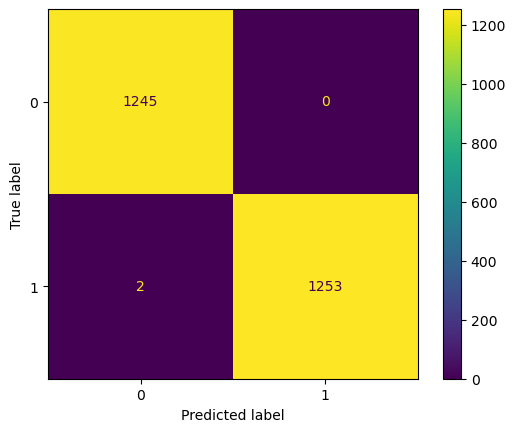

In [400]:
print('\n **************** Confusion Martix (DT Classifier - TF-IDF) - Training Data **************** \n')
cm = confusion_matrix(y_train_modelling_smallerdf, np.array(y_pred_train_dt))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show();

In [401]:
print('\n **************** Classification Report (DT Classifier - TF-IDF) - Testing Data **************** \n')
print(classification_report(y_test_modelling_smallerdf, np.array(y_pred_test_dt)))


 **************** Classification Report (DT Classifier - TF-IDF) - Testing Data **************** 

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       516
           4       0.64      0.67      0.65       484

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000




 **************** Confusion Martix (DT Classifier - TF-IDF) - Testing Data **************** 



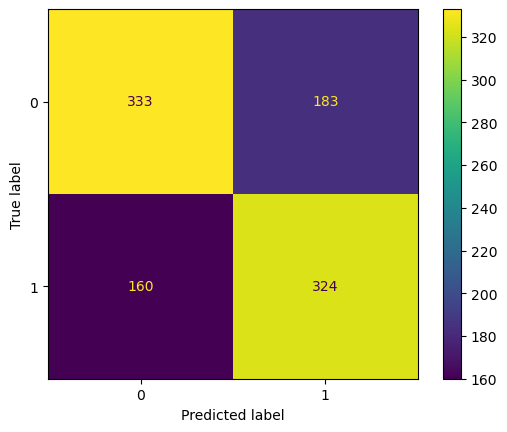

In [402]:
print('\n **************** Confusion Martix (DT Classifier - TF-IDF) - Testing Data **************** \n')
cm = confusion_matrix(y_test_modelling_smallerdf, np.array(y_pred_test_dt))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show();

#### Sentiment Analysis using spaCy

In [ ]:
example = [["this is a positive text", {"POSITIVE": True, "NEGATIVE": False}],
           ["this is a negative text", {"POSITIVE": False, "NEGATIVE": True}]]

In [403]:
X_train_spacy = []

for text, sentiment in zip(X_train_modelling, y_train_modelling):
    if sentiment == 4:
        dic = ({'POSITIVE': True, 'NEGATIVE': False})
    elif sentiment == 0:
        dic = ({'POSITIVE': False, 'NEGATIVE': True})
    
    X_train_spacy.append([text, dic.copy()])

In [404]:
X_train_spacy[:5]

[['bellachica ok lol feel bigger ugh gon na cook',
  {'POSITIVE': True, 'NEGATIVE': False}],
 ['glasses hot girls', {'POSITIVE': True, 'NEGATIVE': False}],
 ['nt time bike lousy day', {'POSITIVE': False, 'NEGATIVE': True}],
 ['wow aps administration charge having good day bloody hidden charges',
  {'POSITIVE': False, 'NEGATIVE': True}],
 ['unfortunately nt magically transported nineties hoped',
  {'POSITIVE': False, 'NEGATIVE': True}]]